# Understanding directional Gaussian noise

We'll now create two directed Gaussian distributions and first, apply regular Gaussian white noise and then the directed Gaussian noise introduced by the paper

In [116]:
from math import sqrt
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt

## 1. Create the distributions

In [117]:
sample1 = np.random.multivariate_normal(
    (11, 5),
    ((10,    4), 
     (4, 2)), 10000)
sample2 = np.random.multivariate_normal(
    (11, -5),
    ((10,    -4),
     (-4, 2)), 10000)

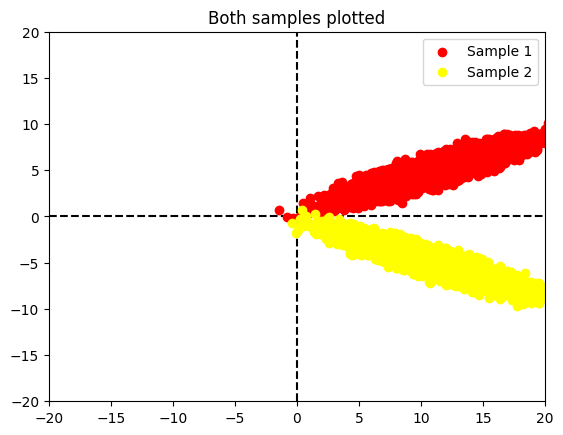

In [118]:
plt.scatter(sample1[:, 0], sample1[:, 1], color='red')
plt.scatter(sample2[:, 0], sample2[:, 1], color='yellow')

plt.title("Both samples plotted")
plt.legend(['Sample 1', 'Sample 2'])
plt.axhline(y=0, color='black', linestyle='--', zorder=0)
plt.axvline(x=0, color='black', linestyle='--', zorder=0)
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.show()

## 2. White noise

Next, we will apply white Gaussian noise (Ho et al., 2020) to the data.

$$
q(\text{x}_t|\text{x}_{t-1}) := \mathcal{N}(\text{x}_t; \sqrt{1 - \beta_t}\text{x}_{t-1}, \beta_t \text{I})
$$

To be able to sample for any given t, we use the following closed form:

$$
\alpha_t := 1 - \beta_t
$$
$$
\overline{\alpha}_t := \prod_{s=1}^t \alpha_s
$$
$$
q(\text{x}_t|\text{x}_0) = \mathcal{N}(\text{x}_t; \sqrt{\overline{\alpha}_t}\text{x}_0, (1 - \overline{\alpha}_t) \text{I})
$$

In this simple case, we set $\beta$ as a constant that does not change depending on the t.



In [119]:
beta = 0.05
alpha = 1 - beta
I = np.eye(2)


def forward_diffusion(sample, t):
    return np.vstack([np.random.multivariate_normal(sqrt(alpha ** t) * x, (1 - alpha ** t) * I, 1) for x in sample])

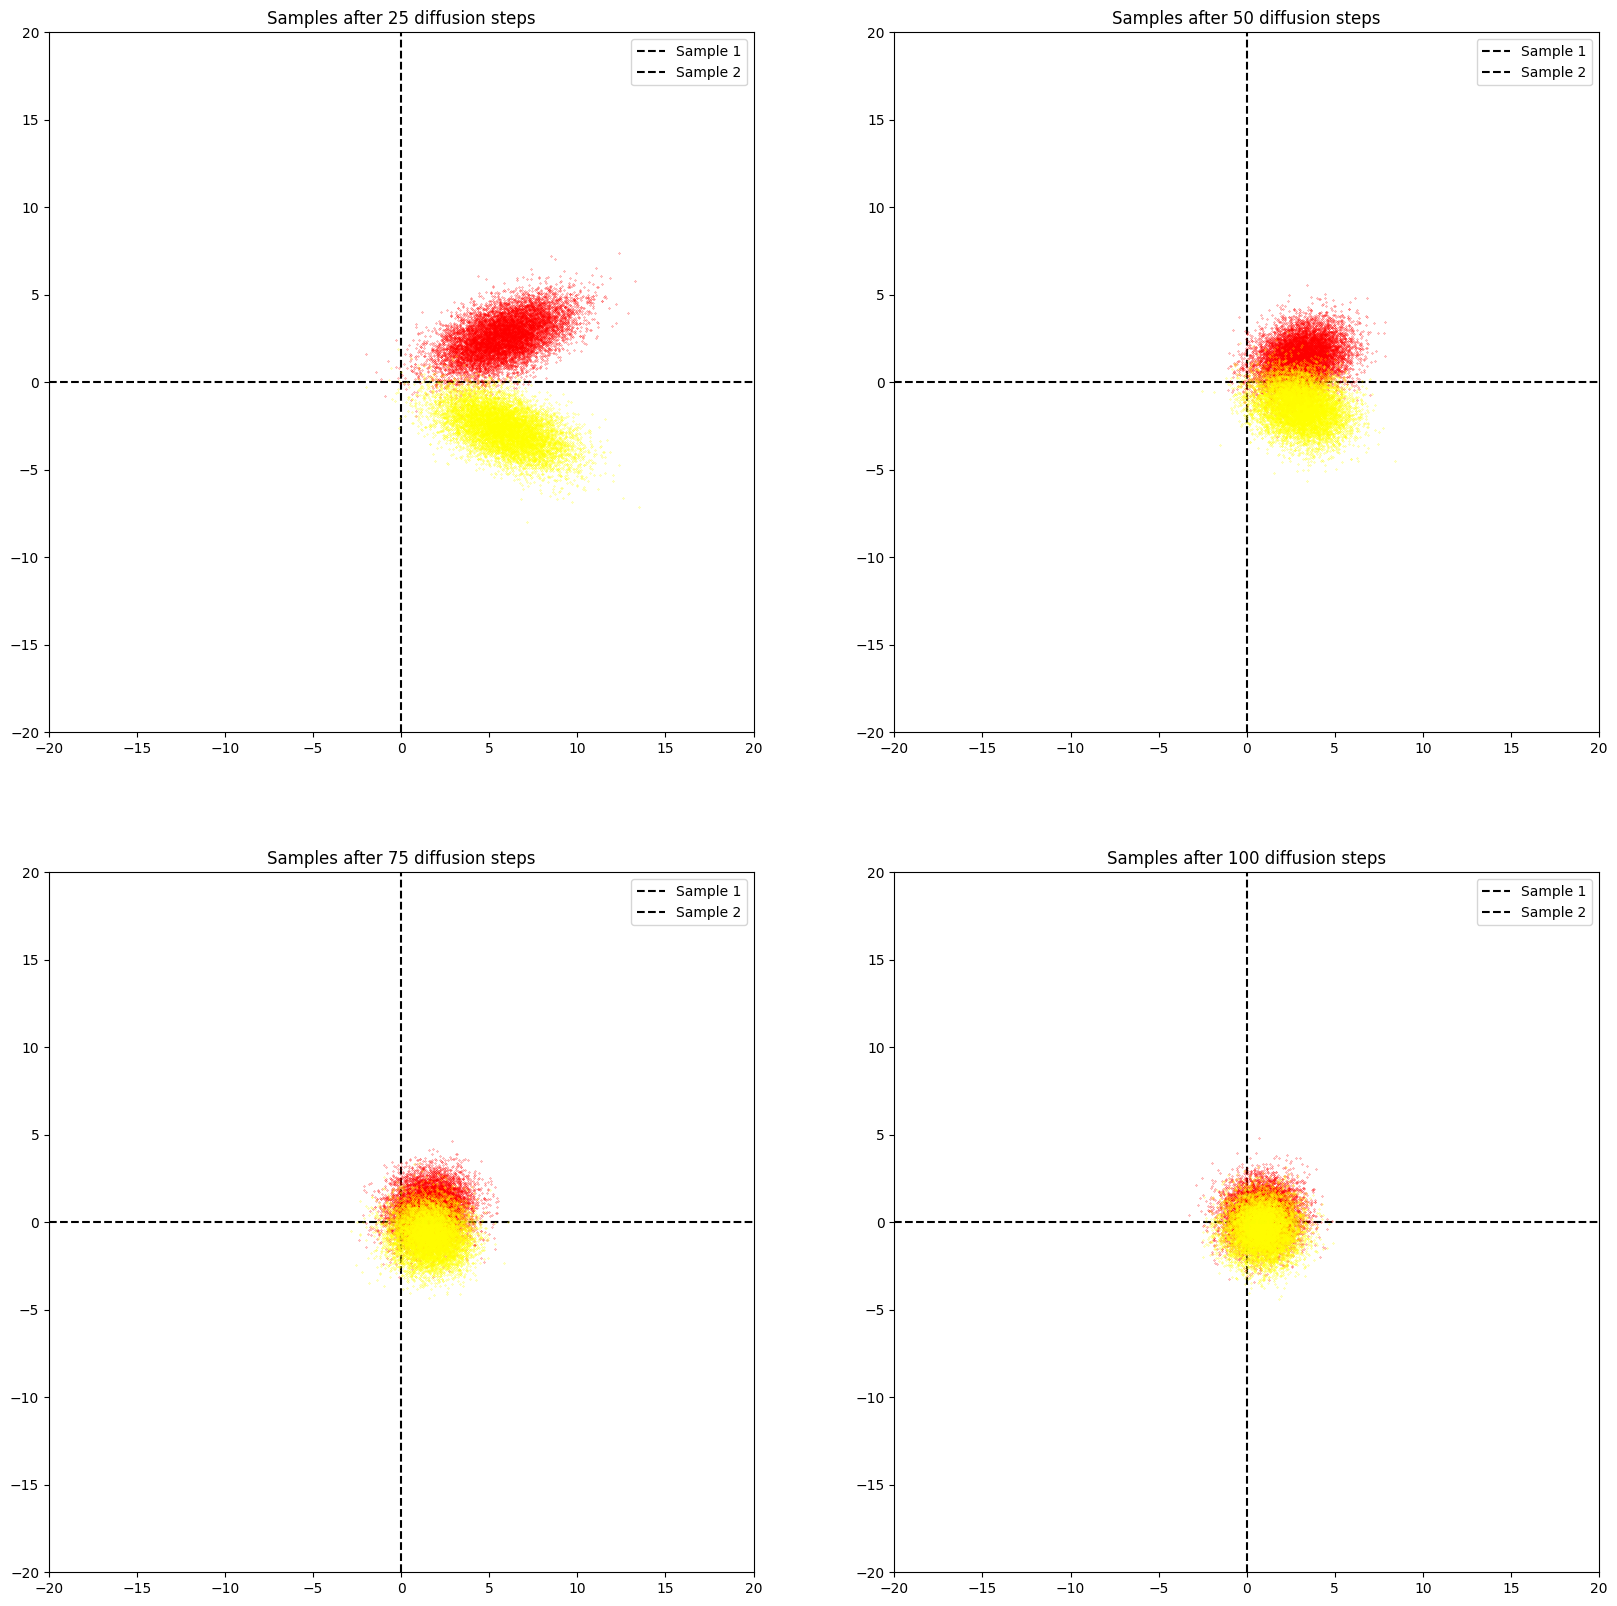

In [120]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_figwidth(20)
fig.set_figheight(20)

# 25 diffusion steps
diffused_sample1 = forward_diffusion(sample1, 25)
diffused_sample2 = forward_diffusion(sample2, 25)
ax1.axhline(y=0, color='black', linestyle='--', zorder=0)
ax1.axvline(x=0, color='black', linestyle='--', zorder=0)
ax1.scatter(diffused_sample1[:, 0], diffused_sample1[:, 1], color='red', s=0.05)
ax1.scatter(diffused_sample2[:, 0], diffused_sample2[:, 1], color='yellow', s=0.05)
ax1.set_title("Samples after 25 diffusion steps")
ax1.legend(['Sample 1', 'Sample 2'])
ax1.set_xlim(-20, 20)
ax1.set_ylim(-20, 20)

# 50 diffusion steps
diffused_sample1 = forward_diffusion(sample1, 50)
diffused_sample2 = forward_diffusion(sample2, 50)
ax2.axhline(y=0, color='black', linestyle='--', zorder=0)
ax2.axvline(x=0, color='black', linestyle='--', zorder=0)
ax2.scatter(diffused_sample1[:, 0], diffused_sample1[:, 1], color='red', s=0.05)
ax2.scatter(diffused_sample2[:, 0], diffused_sample2[:, 1], color='yellow', s=0.05)
ax2.set_title("Samples after 50 diffusion steps")
ax2.legend(['Sample 1', 'Sample 2'])
ax2.set_xlim(-20, 20)
ax2.set_ylim(-20, 20)

# 75 diffusion steps
diffused_sample1 = forward_diffusion(sample1, 75)
diffused_sample2 = forward_diffusion(sample2, 75)
ax3.axhline(y=0, color='black', linestyle='--', zorder=0)
ax3.axvline(x=0, color='black', linestyle='--', zorder=0)
ax3.scatter(diffused_sample1[:, 0], diffused_sample1[:, 1], color='red', s=0.05)
ax3.scatter(diffused_sample2[:, 0], diffused_sample2[:, 1], color='yellow', s=0.05)
ax3.set_title("Samples after 75 diffusion steps")
ax3.legend(['Sample 1', 'Sample 2'])
ax3.set_xlim(-20, 20)
ax3.set_ylim(-20, 20)

# 100 diffusion steps
diffused_sample1 = forward_diffusion(sample1, 100)
diffused_sample2 = forward_diffusion(sample2, 100)
ax4.axhline(y=0, color='black', linestyle='--', zorder=0)
ax4.axvline(x=0, color='black', linestyle='--', zorder=0)
ax4.scatter(diffused_sample1[:, 0], diffused_sample1[:, 1], color='red', s=0.05)
ax4.scatter(diffused_sample2[:, 0], diffused_sample2[:, 1], color='yellow', s=0.05)
ax4.set_title("Samples after 100 diffusion steps")
ax4.legend(['Sample 1', 'Sample 2'])
ax4.set_xlim(-20, 20)
ax4.set_ylim(-20, 20)

plt.show()

In [122]:
class DiffuseAnimation:
    def __init__(self, ax, sample1, sample2, forward_diffusion, t_step=10):
        self.ax = ax
        self.sample1 = sample1
        self.sample2 = sample2
        self.t = 0
        self.t_step = t_step
        self.forward_diffusion = forward_diffusion

        self.plot1 = self.ax.scatter([], [], color='red', s=0.05)
        self.plot2 = self.ax.scatter([], [], color='yellow', s=0.05)

        self.ax.set_xlim(-20, 20)
        self.ax.set_ylim(-20, 20)
        self.ax.grid(True)
        self.ax.axhline(y=0, color='black', linestyle='--', zorder=0)
        self.ax.axvline(x=0, color='black', linestyle='--', zorder=0)
        self.ax.legend(['Sample 1', 'Sample 2'])

    def start(self):
        return self.plot1, self.plot2

    def __call__(self, i):
        if i == 0:
            self.t = 0

        self.plot1.set_offsets(self.forward_diffusion(self.sample1, self.t))
        self.plot2.set_offsets(self.forward_diffusion(self.sample2, self.t))

        self.t += self.t_step

        return self.plot1, self.plot2

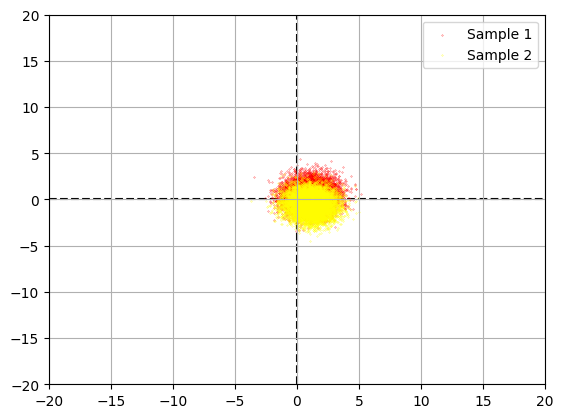

In [123]:
class WhiteNoiseDiffuser:
    def __init__(self, beta):
        self.alpha = 1 - beta
        self.I = np.eye(2)
    
    def __call__(self, sample, t):
        return np.vstack([np.random.multivariate_normal(sqrt(self.alpha ** t) * x, (1 - self.alpha ** t) * self.I, 1) for x in sample])


fig, ax = plt.subplots()
da = DiffuseAnimation(ax, sample1, sample2, WhiteNoiseDiffuser(beta), t_step=10)
anim = animation.FuncAnimation(fig, da, init_func=da.start, frames=10, interval=200, repeat=True, blit=False)

anim.save("white-noise.gif", writer="pillow", fps=3)

![See the information collapsing during the diffusion process](white-noise.gif)

As we can see, the directional information disappears during the diffusion process. We will see, that this is different when using directional noise.

## 2. Directional Noise

The directional noise introduced by Yang et al. (2023) is defined as follows:

$$x_{t,i} = \sqrt{\overline{\alpha}_t} x_{0,i} + \sqrt{1 - \overline{\alpha}_t} \epsilon '$$
$$\epsilon ' = \text{sgn}(x_{0,i}) \odot |\overline{\epsilon}|$$
$$\overline{\epsilon} = \mu + \sigma \odot \epsilon$$
$$\epsilon \sim \mathcal{N}(0, \text{I})$$
Here, $\mu$ and $\sigma$ are the mean and standard deviation of the data while the definition of $\overline{\alpha}_t$ has not changed.

In [132]:
class DirectedNoiseDiffuser:
    def __init__(self, beta):
        self.alpha = 1 - beta
        self.zero = np.array([0, 0])
        self.I = np.eye(2)
    
    def __call__(self, sample, t):
        result = []
        epsilons = np.random.multivariate_normal(self.zero, self.I, len(sample))
        mu = np.mean(sample, axis=0)
        sigma = np.std(sample, axis=0)
        for x, eps in zip(sample, epsilons):
            eps_bar = mu + sigma * eps
            eps_dash = np.sign(x) * np.abs(eps_bar)
            result.append(sqrt(self.alpha ** t) * x + sqrt(1 - self.alpha ** t) * eps_dash)
        return np.vstack(result)

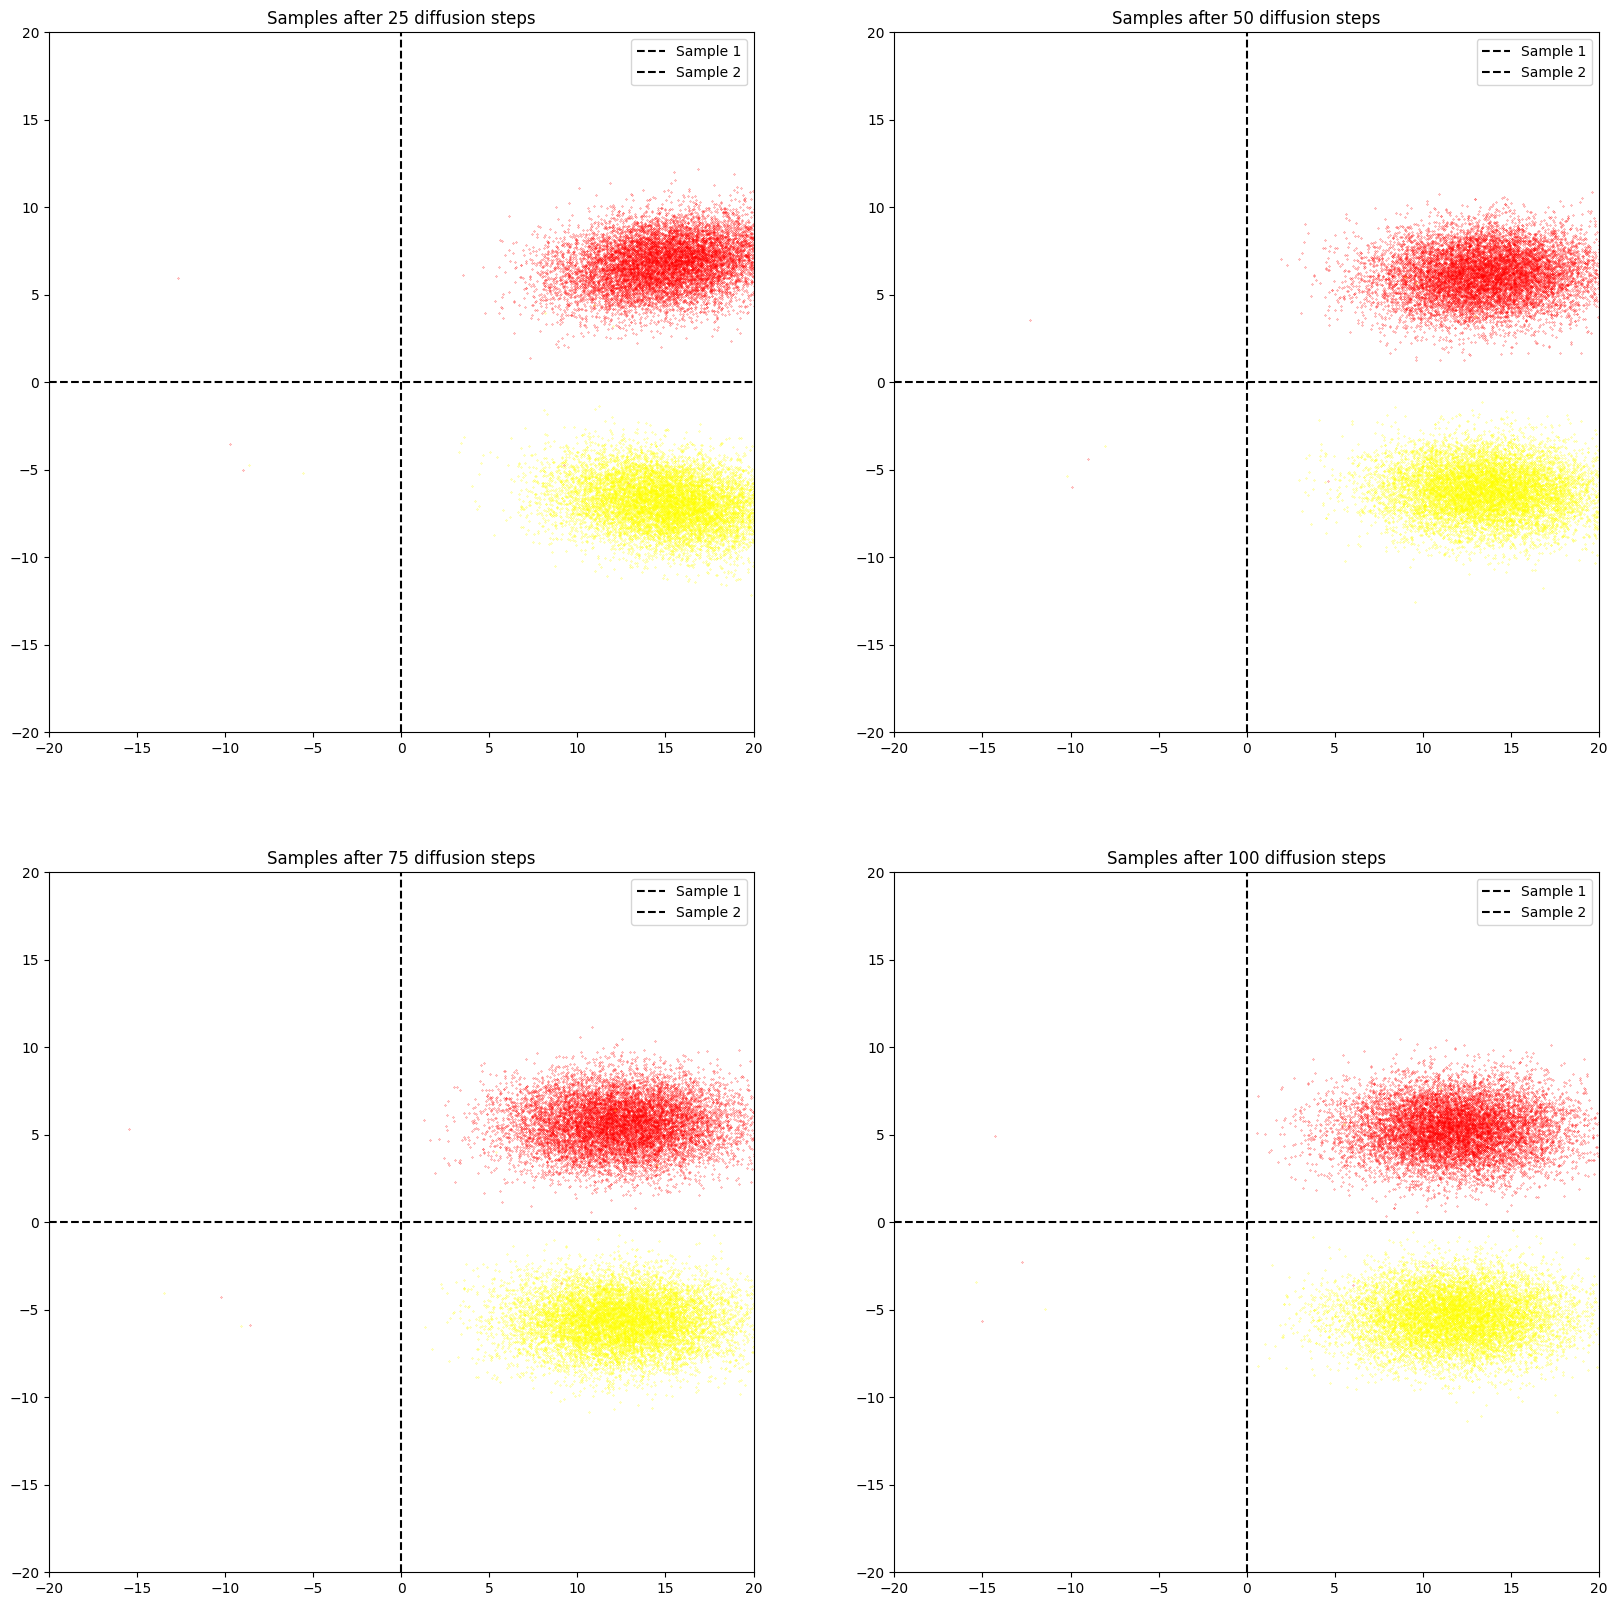

In [134]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_figwidth(20)
fig.set_figheight(20)

directed_noise = DirectedNoiseDiffuser(0.05)

# 25 diffusion steps
diffused_sample1 = directed_noise(sample1, 25)
diffused_sample2 = directed_noise(sample2, 25)
ax1.axhline(y=0, color='black', linestyle='--', zorder=0)
ax1.axvline(x=0, color='black', linestyle='--', zorder=0)
ax1.scatter(diffused_sample1[:, 0], diffused_sample1[:, 1], color='red', s=0.05)
ax1.scatter(diffused_sample2[:, 0], diffused_sample2[:, 1], color='yellow', s=0.05)
ax1.set_title("Samples after 25 diffusion steps")
ax1.legend(['Sample 1', 'Sample 2'])
ax1.set_xlim(-20, 20)
ax1.set_ylim(-20, 20)

# 50 diffusion steps
diffused_sample1 = directed_noise(sample1, 50)
diffused_sample2 = directed_noise(sample2, 50)
ax2.axhline(y=0, color='black', linestyle='--', zorder=0)
ax2.axvline(x=0, color='black', linestyle='--', zorder=0)
ax2.scatter(diffused_sample1[:, 0], diffused_sample1[:, 1], color='red', s=0.05)
ax2.scatter(diffused_sample2[:, 0], diffused_sample2[:, 1], color='yellow', s=0.05)
ax2.set_title("Samples after 50 diffusion steps")
ax2.legend(['Sample 1', 'Sample 2'])
ax2.set_xlim(-20, 20)
ax2.set_ylim(-20, 20)

# 75 diffusion steps
diffused_sample1 = directed_noise(sample1, 75)
diffused_sample2 = directed_noise(sample2, 75)
ax3.axhline(y=0, color='black', linestyle='--', zorder=0)
ax3.axvline(x=0, color='black', linestyle='--', zorder=0)
ax3.scatter(diffused_sample1[:, 0], diffused_sample1[:, 1], color='red', s=0.05)
ax3.scatter(diffused_sample2[:, 0], diffused_sample2[:, 1], color='yellow', s=0.05)
ax3.set_title("Samples after 75 diffusion steps")
ax3.legend(['Sample 1', 'Sample 2'])
ax3.set_xlim(-20, 20)
ax3.set_ylim(-20, 20)

# 100 diffusion steps
diffused_sample1 = directed_noise(sample1, 100)
diffused_sample2 = directed_noise(sample2, 100)
ax4.axhline(y=0, color='black', linestyle='--', zorder=0)
ax4.axvline(x=0, color='black', linestyle='--', zorder=0)
ax4.scatter(diffused_sample1[:, 0], diffused_sample1[:, 1], color='red', s=0.05)
ax4.scatter(diffused_sample2[:, 0], diffused_sample2[:, 1], color='yellow', s=0.05)
ax4.set_title("Samples after 100 diffusion steps")
ax4.legend(['Sample 1', 'Sample 2'])
ax4.set_xlim(-20, 20)
ax4.set_ylim(-20, 20)

plt.show()

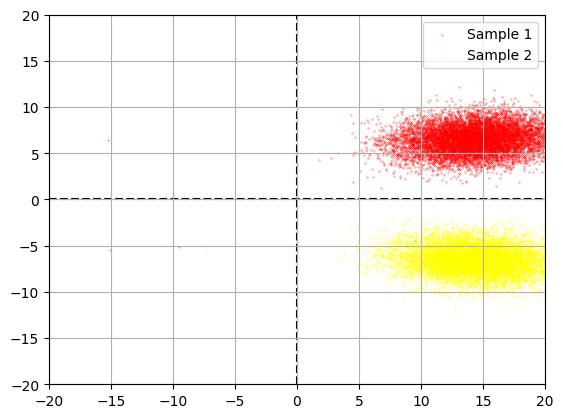

In [137]:
fig, ax = plt.subplots()
da = DiffuseAnimation(ax, sample1, sample2, DirectedNoiseDiffuser(0.01), t_step=10)
anim = animation.FuncAnimation(fig, da, init_func=da.start, frames=20, interval=200, repeat=True, blit=False)

anim.save("directed-noise.gif", writer="pillow", fps=3)

![See the information collapsing during the diffusion process](directed-noise.gif)